In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
warnings.filterwarnings('ignore', category=FutureWarning, module='pandas')

In [95]:
df = pd.read_csv("diabetes.csv")

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


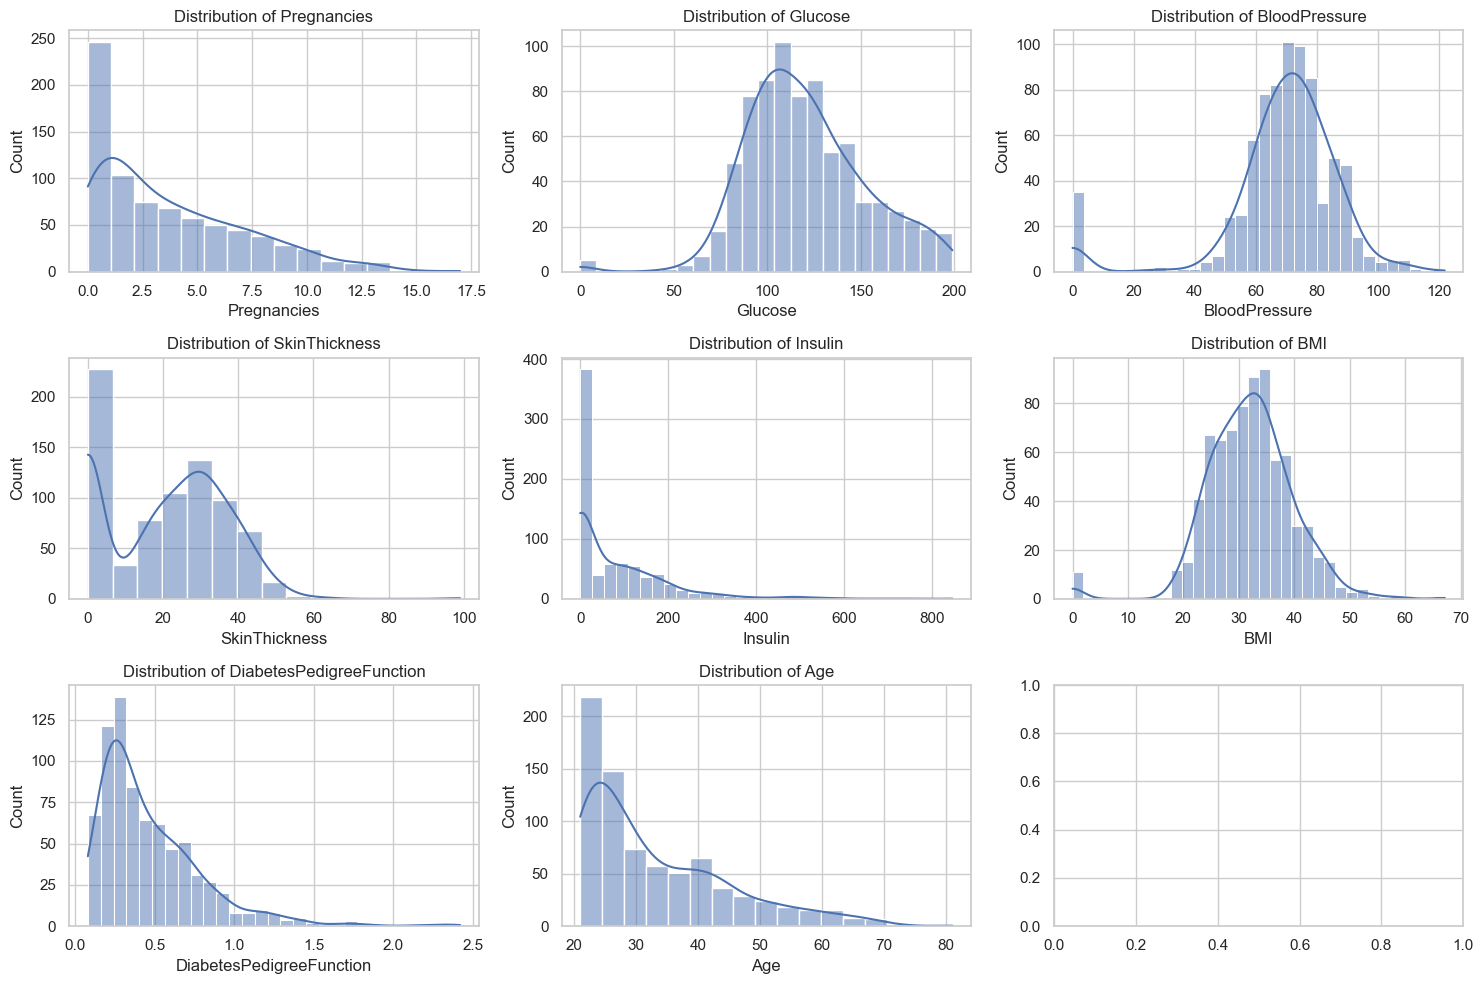

In [97]:
sns.set(style="whitegrid")

# Create a figure and axis for the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()

# Loop through each column (excluding the 'Outcome' column)
for i, column in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [98]:
# # Create a figure and axis for the subplots
# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# # Flatten the 2D axes array for easier indexing
# axes = axes.flatten()   

# # Loop through each column (excluding the 'Outcome' column)
# for i, column in enumerate(df.columns):
#     # Exclude the 'Outcome' column
#     if column != 'Outcome':
#         # Create a boxplot for the current column
#         sns.boxplot(data=df, y=column, ax=axes[i])
#         axes[i].set_title(f'Boxplot of {column}')
        
# # Adjust the layout to prevent overlap
# plt.tight_layout()

# # Show the plots
# plt.show()

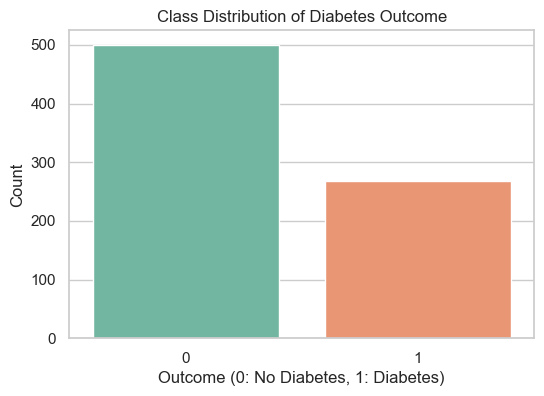

Outcome
0    500
1    268
Name: count, dtype: int64


In [99]:
# Calculate the class distribution
class_distribution = df['Outcome'].value_counts()

# Plot the class distribution
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Class Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

# Print the class distribution counts
print(class_distribution)

In [100]:
from sklearn.model_selection import train_test_split

X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=0)

# Fit and apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

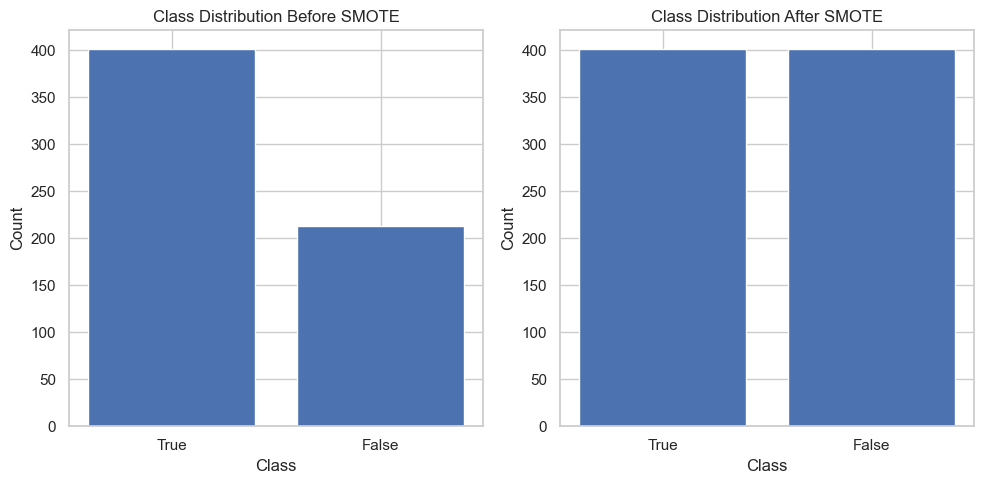

In [102]:
# Calculate class distribution counts before and after SMOTE
class_distribution_before = y_train.value_counts().sort_index()
class_distribution_after = y_train_resampled.value_counts().sort_index()

class_labels = ['True', 'False']

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(class_labels, class_distribution_before.values)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(class_labels, class_distribution_after.values)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [103]:
# from sklearn.preprocessing import StandardScaler

# # Standardize (normalize) the feature data
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [104]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=2, 
                                                                  min_samples_split=2, 
                                                                  min_samples_leaf=1)
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [105]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# param_grid = {
#     'max_depth': [2, 3, 5, 7, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'criterion': ['gini', 'entropy'],
#     'max_features': [None, 'sqrt', 'log2'],
#     'splitter': ['best', 'random']
# }

# # Make a custom scorer
# def custom_scorer(y_true, y_pred):
#     accuracy = accuracy_score(y_true, y_pred)
#     precision = precision_score(y_true, y_pred)
#     recall = recall_score(y_true, y_pred)
#     f1 = f1_score(y_true, y_pred)
    
#     combined_score = 0.25 * accuracy + 0.25 * precision + 0.25 * recall + 0.25 * f1
    
#     return combined_score

# scoring_aprf1 = make_scorer(custom_scorer)

# clf = DecisionTreeClassifier(random_state=0)

# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=scoring_aprf1, cv=5)

# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_

# print(best_params)

In [106]:
# best_max_depth = best_params['max_depth']
# best_min_samples_split = best_params['min_samples_split']
# best_min_samples_leaf = best_params['min_samples_leaf']
# best_min_criterion = best_params['criterion']
# best_min_max_features = best_params['max_features']
# best_min_splitter = best_params['splitter']


# # With Pre-Pruning
# clf = DecisionTreeClassifier(random_state=0, criterion=best_min_criterion, max_depth=best_max_depth, 
#                                                                   min_samples_split=best_min_samples_split, 
#                                                                   min_samples_leaf=best_min_samples_leaf,
#                                                                   max_features=best_min_max_features,
#                                                                   splitter=best_min_splitter)
# clf.fit(X_train, y_train)

In [107]:
y_preds = clf.predict(X_test)

In [108]:
print("Accuracy %.4f" % accuracy_score(y_test, y_preds))
print("Precision %.4f" % precision_score(y_test, y_preds))
print("Recall %.4f" % recall_score(y_test, y_preds))
print("F1 %.4f" % f1_score(y_test, y_preds))

Accuracy 0.7597
Precision 0.6957
Recall 0.5818
F1 0.6337


[Text(0.5, 0.8333333333333334, 'Glucose <= 127.5\nentropy = 1.0\nsamples = 802\nvalue = [401, 401]\nclass = No Diabetes'),
 Text(0.25, 0.5, 'BMI <= 26.95\nentropy = 0.898\nsamples = 458\nvalue = [314, 144]\nclass = No Diabetes'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.173\nsamples = 116\nvalue = [113, 3]\nclass = No Diabetes'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.978\nsamples = 342\nvalue = [201, 141]\nclass = No Diabetes'),
 Text(0.75, 0.5, 'BMI <= 29.722\nentropy = 0.816\nsamples = 344\nvalue = [87, 257]\nclass = Diabetes'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.994\nsamples = 75\nvalue = [41, 34]\nclass = No Diabetes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.66\nsamples = 269\nvalue = [46, 223]\nclass = Diabetes')]

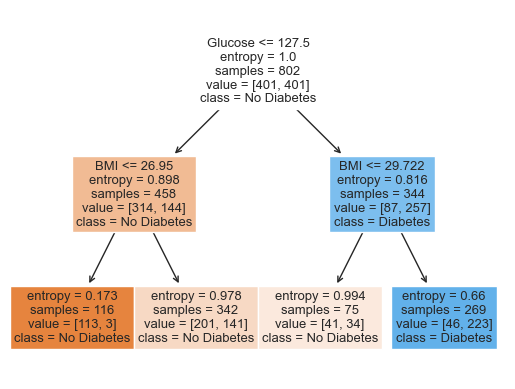

In [109]:
plot_tree(clf, 
          feature_names = list(X.columns),
          class_names = ['No Diabetes', 'Diabetes'],
          filled = True)